We need to go over all the algorithms and features we write because roi going to ask us about this.
For example he said: What's the difference between XGBoost and GradientBoosting and so on.

# Dataset information:
Fashion MNIST was introduced in August 2017, by research lab at Zalando Fashion.
It's goal is to serve as a new benchmark for testing machine learning algorithms, as MNIST became too easy and overused. While MNIST consists of handwritten digits, Fashion MNIST is made of images of 10 different clothing objects. Each image has the following properties:

Its size is 28 × 28 pixels.
Rotated accordingly and represented in grayscale, with integer values ranging from 0 to 255.
Blank space represented by black color and having value 0.
In the dataset, we distinguish between the following clothing objects:

1)    T-shirt/Top  👕

2)    Trousers      👖

3)    Pullover     

4)    Dress     💃

5)    Coat      🧥

6)    Sandal     👡

7)    Shirt      👕

8)    Sneaker     👟
 
9)    Bag       👛

10)   Ankle Boot    🦶️

the dataset cosists from 60000 train images and 10000 images for test

We can't touch the test set

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# for predicting the classification of an image we need to go over the next steps:

1) load the data.

2) reasize the data, for better understanding of the computer (for example: from 2d ---> 1d, pca and so on..)+ visualize the data.

3) scale the values of the pixels to [0,255] range.

4) select models for the prediction in the end.

5) run the pre trained models.

6) display the results of every model.

7) ensemble the models and use the best ensemble for predicting.

#  step 1: loading the data from tensorflow:

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train),(X_test, Y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

# step 2: reasize the data:
as we can see, our data has 3 dimensions, we can convert it into 2 dimensions and work with the data better.
why we can do so?
the computer does not understand that the picture is shoe or sandal, for him it is a pixels aranged with order, so it's not matter.

In [5]:
arr_train = X_train.reshape(60000, 28*28)
df_train = pd.DataFrame(arr_train)
df_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [6]:
df_train.shape

(60000, 784)

In [7]:
X_test.shape

(10000, 28, 28)

# as we expected we need to do so for the test set :

In [8]:
arr_test = X_test.reshape(10000, 28*28)
df_test = pd.DataFrame(arr_test)
df_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_test.shape

(10000, 784)

now lets visualize the Y_train to learn more about him:

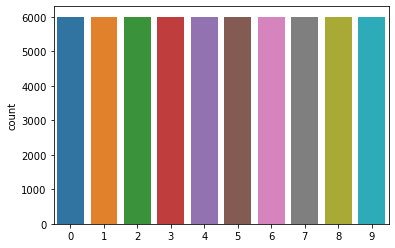

In [10]:
g = sns.countplot(Y_train)

as we can see, the Y_train divided into 10 categories (sandal, ankle boot, shirt and so on...), every category has exactly 6000 images for training.

# now lets plot some of the data to learn more about him:

In [11]:
Names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

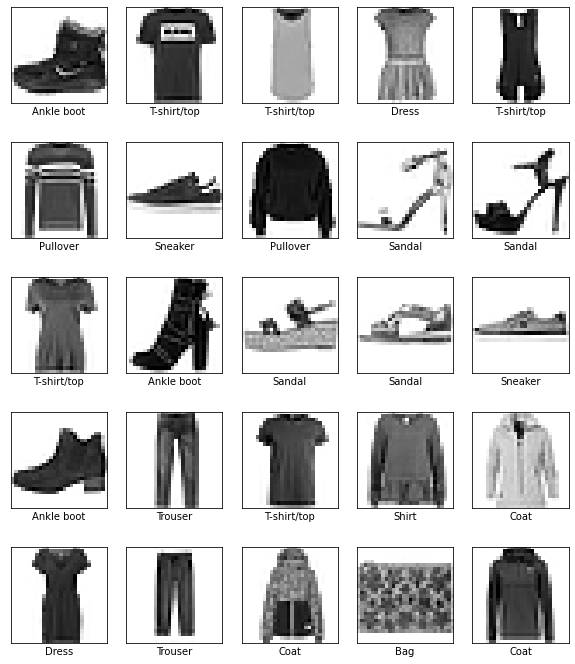

In [12]:
plt.figure(figsize=(10,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Names[Y_train[i]])
plt.show()

what we can learn from this plot?
for true, not too much, but it's fun to see some of the train images and the computer classify them. 

now we want to scale the data into [0,255] 

In [13]:
max_element = np.max(X_train)
min_element = np.min(X_train)
print('maximum element in the array is:',
      max_element)
print('minimum element in the array is:',
      min_element)

maximum element in the array is: 255
minimum element in the array is: 0


but we can see that the values are between 0-255 so wee don't need to scale it 😎

# pca- principle component analysys:

why do we need this?
because we got a 60000 images for train, each image has a 784 dimensions and it's hard to work with. 
So what we gonna do, is to reduce the number of dimensions with try to keep as much as we can variance for the real dataset. 

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(df_train)
X_recovered = pca.inverse_transform(X_reduced)

In [67]:
X_reduced.shape

(60000, 187)

we need to do so for the test set, but! not with fit, just transform:

In [76]:
Y_reduced = pca.transform(df_test)

In [77]:
Y_reduced.shape
##see if i need this

(10000, 187)

We choose n_componenets = 0.95 beacause it is save 95% from the variance of the data exactly as we want.

So, we reduced the number of dimensions in the train from 784 to 187 with 95% save of the variance!!

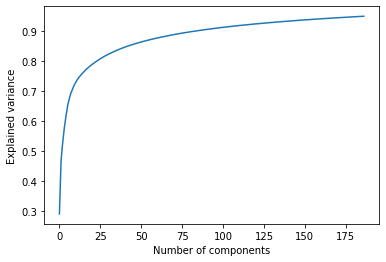

In [78]:
plt.plot (np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi = 100)


as we can see, we plot the n_components and the variance accordingly to the components. and the variance go up when n_components goes up to.

In [81]:
pca.explained_variance_ratio_
## that function tells us the variability of any component by itself.

array([0.29039228, 0.1775531 , 0.06019222, 0.04957428, 0.03847655,
       0.03460769, 0.02341691, 0.01905414, 0.01349843, 0.01314267,
       0.00992875, 0.00913255, 0.00765793, 0.00659706, 0.00607851,
       0.00589821, 0.00551934, 0.005245  , 0.00458079, 0.00455515,
       0.00433684, 0.00407097, 0.00384758, 0.00372551, 0.00361107,
       0.00350656, 0.00333241, 0.0031936 , 0.00308063, 0.00293273,
       0.00275603, 0.00265062, 0.00263703, 0.00255835, 0.00246212,
       0.00235901, 0.0023029 , 0.00225522, 0.00218476, 0.00209324,
       0.00200282, 0.0019574 , 0.00194689, 0.00182783, 0.00175354,
       0.00171926, 0.00168792, 0.00163975, 0.00160908, 0.00154846,
       0.00152295, 0.00150044, 0.00146795, 0.00143312, 0.00138277,
       0.00136997, 0.00131154, 0.00128846, 0.00127249, 0.00125851,
       0.00121452, 0.00120198, 0.00118143, 0.00116257, 0.00115583,
       0.00112295, 0.00111075, 0.00109669, 0.00105128, 0.00104659,
       0.001031  , 0.00101051, 0.00097795, 0.00095689, 0.00093

In [82]:
np.cumsum(pca.explained_variance_ratio_*100)
## Also, note that the values of the array are sorted in descending order.

array([29.03922792, 46.7945379 , 52.81375988, 57.77118789, 61.61884303,
       65.07961235, 67.42130287, 69.3267165 , 70.67655995, 71.99082704,
       72.9837022 , 73.8969571 , 74.66274966, 75.32245523, 75.93030594,
       76.52012741, 77.0720617 , 77.59656153, 78.05464046, 78.51015518,
       78.94383874, 79.3509362 , 79.73569421, 80.10824561, 80.46935229,
       80.82000848, 81.15324966, 81.47260944, 81.78067217, 82.07394504,
       82.34954775, 82.61460969, 82.87831305, 83.13414836, 83.38036064,
       83.61626191, 83.84655182, 84.07207417, 84.29055014, 84.49987422,
       84.70015663, 84.89589629, 85.09058563, 85.27336882, 85.44872305,
       85.62064925, 85.78944094, 85.95341576, 86.11432373, 86.26917003,
       86.42146539, 86.57150976, 86.71830517, 86.86161748, 86.99989441,
       87.13689125, 87.26804559, 87.39689178, 87.52414099, 87.64999229,
       87.77144478, 87.89164326, 88.0097864 , 88.12604385, 88.24162671,
       88.35392211, 88.46499735, 88.57466646, 88.6797943 , 88.78

In [83]:
print( "variance explained by the first principal componenet = ",
     np.cumsum (pca.explained_variance_ratio_*100)[0])
print( "variance explained by the first 50 principal componenet = ",
     np.cumsum (pca.explained_variance_ratio_*100)[50])
print( "variance explained by the first 100 principal componenet = ",
     np.cumsum (pca.explained_variance_ratio_*100)[100])
print( "variance explained by the first 150 principal componenet = ",
     np.cumsum (pca.explained_variance_ratio_*100)[150])
print( "variance explained by the first 183 principal componenet = ",
     np.cumsum (pca.explained_variance_ratio_*100)[182])

variance explained by the first principal componenet =  29.039227921366017
variance explained by the first 50 principal componenet =  86.42146538978565
variance explained by the first 100 principal componenet =  91.29985274938072
variance explained by the first 150 principal componenet =  93.78776665623919
variance explained by the first 183 principal componenet =  94.88112378778594


Now let's see what does the pca doing, we gonna use an example for explaining that.

non-compressed image


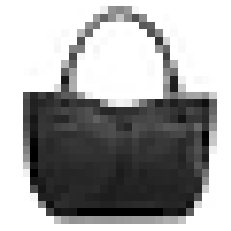

In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print('non-compressed image')
plt.imshow(X_train[100].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

95% variance compressed image


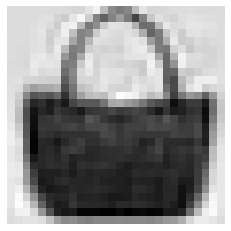

In [85]:
print('95% variance compressed image')
plt.imshow(X_recovered[100].reshape(28,28), cmap="binary")
plt.axis("off")
plt.show()

# Ensemble XGboost classifier

In [16]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)
y_pred_boost = xgb_model.predict(X_test)
accuracy_score(Y_test, y_pred_boost)

ValueError: Please reshape the input data into 2-dimensional matrix.

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled2, Y_train)
y_pred_boost = xgb_model.predict(X_test_scaled2)
accuracy_score(Y_test, y_pred_boost)

# Evaluation

The naive bayes destroy my predictions so I need to explain that the naive bayes is not a good algorithm and throw it.

In [ ]:
# models = [naive_model, knn_model, Rf_model, Dt_model, voting_model]

In [ ]:
# models_name = ['naive_model', 'knn_model', 'Rf_model', 'Dt_model', 'voting_model']

In [ ]:
# count = 0
# for model in models:
#     model.fit(X_train_scaled, Y_train)
#     y_pred_train = model.predict(X_train_scaled)
#     y_pred_test = model.predict(X_test_scaled)
#     print(f'The accuracy score in the train set for {models_name[count]} model is', accuracy_score(Y_train, y_pred_train))
#     print(f'The accuracy score in the test set for {models_name[count]} model is', accuracy_score(Y_test, y_pred_test))
#     print()
#     count = count + 1